In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import NMF, non_negative_factorization

In [2]:
# Rating DB
df = pd.read_csv('ratings.csv')


In [3]:
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
df.shape

(100836, 4)

In [5]:
# Movie_Titles
movie_titles = pd.read_csv('movies.csv')

In [6]:
movie_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
df = pd.merge(df, movie_titles, on='movieId')

In [8]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [9]:
df.shape

(100836, 6)

In [10]:
df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [11]:
# New DataFrame ratings

ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [12]:
ratings.shape

(9719, 1)

In [13]:
# number of ratings for each movie

ratings['number_of_ratings'] = df.groupby('title')['rating'].count()
ratings.head()

,rating,number_of_ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


In [14]:
# Most rated movies 

ratings.sort_values('number_of_ratings', ascending=False).head(10)

,rating,number_of_ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


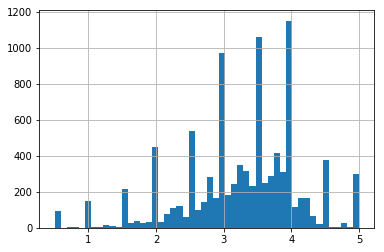

In [15]:
ratings['rating'].hist(bins=50)

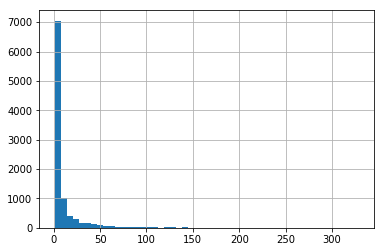

In [16]:
ratings['number_of_ratings'].hist(bins=50)

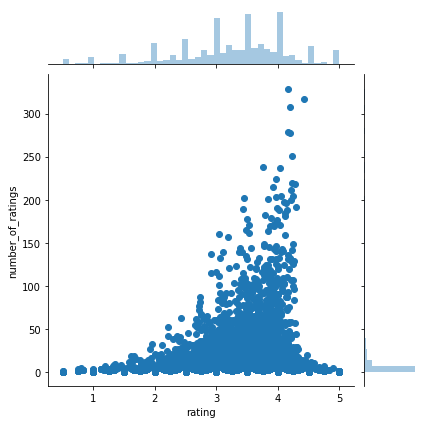

In [17]:
import seaborn as sns
sns.jointplot(x='rating', y='number_of_ratings', data=ratings)

In [18]:

movie_matrix = df.pivot_table(index="title", columns='userId', values='rating')

In [ ]:
movie_matrix.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
'Hellboy': The Seeds of Creation (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Round Midnight (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
movie_matrix.mean()

userId
1      4.366379
2      3.948276
3      2.435897
4      3.555556
5      3.636364
6      3.493631
7      3.230263
8      3.574468
9      3.260870
10     3.278571
11     3.781250
12     4.390625
13     3.645161
14     3.395833
15     3.448148
16     3.724490
17     4.209524
18     3.732072
19     2.607397
20     3.590909
21     3.260722
22     2.571429
23     3.648760
24     3.650000
25     4.807692
26     3.238095
27     3.548148
28     3.019332
29     4.141975
30     4.735294
         ...   
581    4.375000
582    4.026786
583    3.294643
584    4.108434
585    4.336066
586    4.365385
587    3.975758
588    3.250000
589    4.025000
590    3.355769
591    3.277778
592    3.585106
593    3.266990
594    3.924569
595    4.200000
596    3.495134
597    3.977427
598    3.809524
599    2.642050
600    2.991481
601    4.425743
602    3.392593
603    3.507953
604    3.480000
605    3.210407
606    3.657399
607    3.786096
608    3.134176
609    3.270270
610    3.688556
Length: 610, dtyp

In [ ]:
# PCA

Xm_m = movie_matrix - movie_matrix.mean()
Xm_m

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.311444
'Hellboy': The Seeds of Creation (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Round Midnight (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Tis the Season for Love (2015),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"'burbs, The (1989)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'night Mother (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(500) Days of Summer (2009),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.188556


In [ ]:
Xm_m = Xm_m.fillna(0)
Xm_m

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.311444
'Hellboy': The Seeds of Creation (2004),0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
'Round Midnight (1986),0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
'Salem's Lot (2004),0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
'Til There Was You (1997),0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
'Tis the Season for Love (2015),0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
"'burbs, The (1989)",0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
'night Mother (1986),0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
(500) Days of Summer (2009),0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,-0.188556


In [ ]:
pca = PCA(n_components=50)
pca

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.fit(Xm_m)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
Xm_mt = pca.transform(Xm_m)
Xm_mt

array([[ 0.05195241,  0.0389624 ,  0.01993199, ..., -0.00293574,
         0.00806564,  0.00340957],
       [ 0.01362185, -0.00462839,  0.0109697 , ..., -0.0105408 ,
         0.00383803, -0.01120026],
       [-0.00775086,  0.00306956, -0.00240134, ..., -0.00117404,
         0.00192693,  0.00836182],
       ...,
       [-0.68869846, -0.42080772, -0.39768383, ...,  0.19190439,
        -0.07566341,  0.03817304],
       [-0.59498876,  0.74454321,  0.12042951, ...,  0.97126102,
        -0.50840626, -0.49674189],
       [-0.02671174, -0.00964552, -0.00277944, ..., -0.05123969,
         0.03092463, -0.0792546 ]])

In [ ]:
# Transform negative values to positive

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
Xm_mt_scaled = scaler.fit_transform(Xm_mt)

In [ ]:
model = NMF(n_components=2, init='random', random_state=10)

In [ ]:
res_nmf = model.fit_transform(Xm_mt_scaled)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

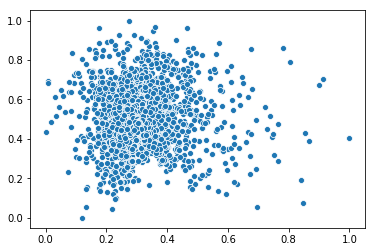

In [ ]:
sns.scatterplot(Xm_mt_scaled[:,0], Xm_mt_scaled[:,1])

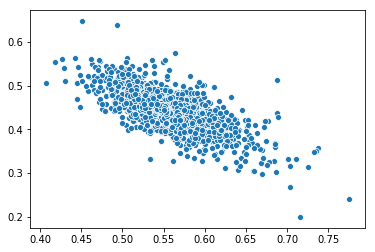

In [ ]:
sns.scatterplot(res_nmf[:,0], res_nmf[:,1])

In [ ]:
model = NMF(n_components=10, init='random', random_state=10)

In [ ]:
res_nmf = model.fit_transform(Xm_mt_scaled)

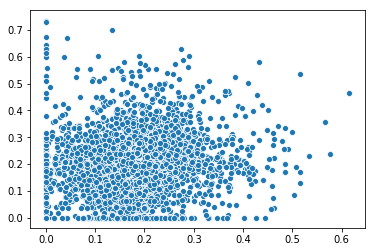

In [ ]:
sns.scatterplot(res_nmf[:,9], res_nmf[:,4])

In [ ]:
from sklearn.manifold import TSNE

model = TSNE(random_state=10)
res_nmf = model.fit_transform(Xm_mt_scaled)
sns.scatterplot(res_nmf[:,0], res_nmf[:,1])
plt.figure(figsize=(10, 10))

In [ ]:
plt.savefig('TSNE.png')

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


In [ ]:
pca.components_

In [ ]:
pca.explained_variance_ratio_

In [ ]:
np.dot(Xm_m.values, pca.components_.T)

In [ ]:
for index, row in df.iterrows():
# create a new movie
m = Movie()
m.movie_id = input('enter a movie ID: ')
m.title = input('enter a title: ')
m.genre = input('enter a genre: ')
m.save()

In [ ]:
# Interacction function 

Xm_m

In [ ]:
# movie_matrix = df.pivot_table(index="userId", 
#                              columns='title', values='rating')

# Creating interaction matrix using rating data

movie_matrix = movie_matrix(df = ratings,
                                         user_col = 'userId',
                                         item_col = 'movieId',
                                         rating_col = 'rating')
movie_matrix.head()

# Create User Dict

# userId = create_userId(interactions=interactions)


In [ ]:
# Create Item dict
movies_dict = create_item_dict(df = movies,
                               id_col = 'movieId',
                               name_col = 'title')